<a href="https://colab.research.google.com/github/julloa2026/TAA/blob/main/Laboratorio_Actividad_1_05Ene26_copia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [45]:
## importando librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
## cargar el dataset
## Se creo un repositorio en Github para guardar dataset AirQualityUCI.csv
url_dataset = 'https://raw.githubusercontent.com/julloa2026/TAA/refs/heads/main/AirQualityUCI.csv'
df = pd.read_csv(url_dataset, sep=';',  decimal=',', engine='python')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [47]:
## ¿cuántas instancias tiene el dataset?
num_instancias = len(df)
print(num_instancias)


9471


Existen 9471 instancias (filas) en el dataset

In [48]:
## ¿cuál es el tipo de datos de cada una de las columnas?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


Si bien tenemos 9471, podemos observar que 9357 datos son no nulos en las primeras 15 columnas, podemos afirmar entonces que hay 114 datos nulos en esas columnas. Las columnas 16(Unnamed:15) y 17(Unnamed:16) no presentan datos, por lo tanto las eliminé en las preguntas posteriores .

In [49]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?

categóricas = df.select_dtypes(include=['object', 'category']).shape[1]
continuas = df.select_dtypes(include=['float64', 'int64']).shape[1]

print(f"Columnas categóricas: {categóricas}")
print(f"Columnas contínuas: {continuas}")

Columnas categóricas: 2
Columnas contínuas: 15


Existen dos columnas categóricas que son Date y Time, como tambien es possible evidenciar en la pregunta numero 1 al rodar: df.head(). Existen 15 columnas de tipo continuas, mismo sabiendo de que la columna 16 y 17 son nulas al rodar df.info() ellas son de tipo float

In [50]:
## ¿existen valores nulos en el dataset?
df.isnull().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


Si existen valores nulos en todas las columnas, en las 15 primeras coolumnas son 114 y las dos ultimas columnas todos los datos son nulos.  

In [52]:
## ¿cuál es la variable respuesta?¿de qué tipo es?
df['CO(GT)'].dtype

dtype('float64')

Como el dataset es enfocado a analizar la calidad del aire, la variable respuesta es el CO(GT) que representa la concentración real de monóxido de carbono y es de tipo float64

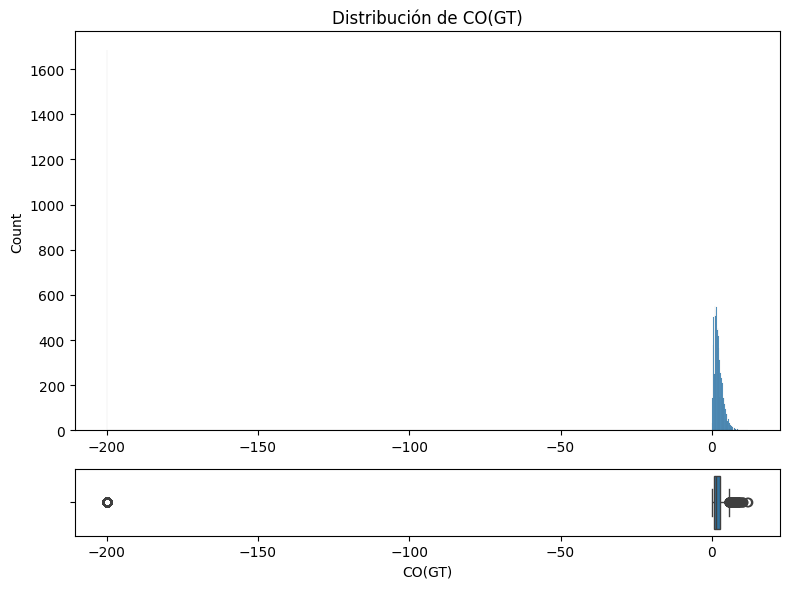

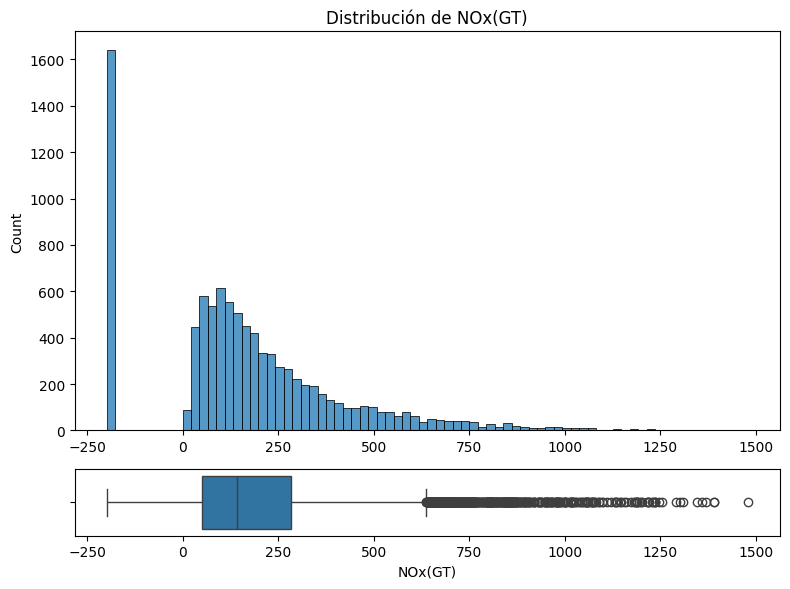

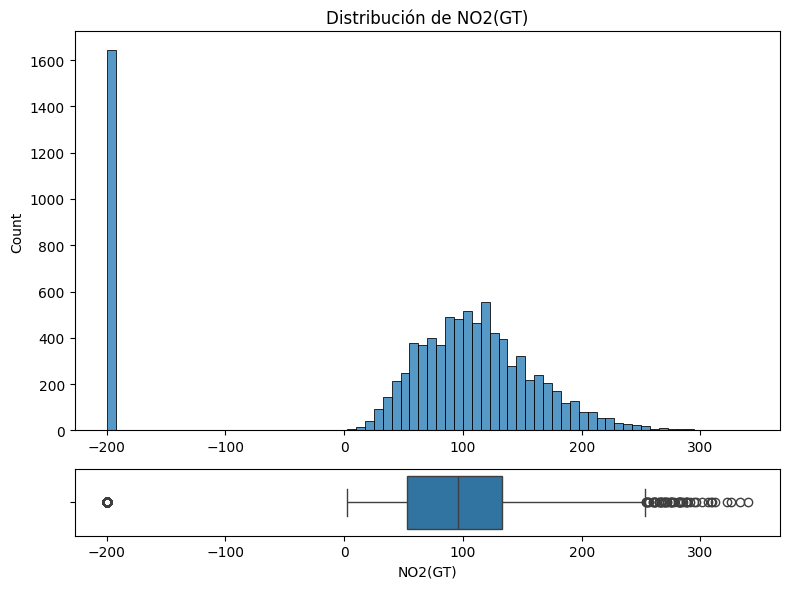

In [53]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2?
variables = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']

for var in variables:
    fig, axis = plt.subplots(
        2, 1,
        figsize=(8, 6),
        gridspec_kw={'height_ratios': [6, 1]}
    )
    sns.histplot(ax=axis[0], data=df, x=var)
    axis[0].set(xlabel=None)
    axis[0].set_title(f'Distribución de {var}')

    sns.boxplot(ax=axis[1], data=df, x=var)


    plt.tight_layout()
    plt.show()


A partir de la visualización, se observa que las tres variables presentan valores atípicos alejados del cuerpo principal de la distribución.

Además, sus distribuciones son asimétricas y claramente sesgadas hacia la derecha, donde la mayoría de las observaciones se concentran en valores bajos y existen algunos episodios con concentraciones elevadas. Por lo tanto, ninguna de las variables sigue una distribución normal.

¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

De acuerdo a los histogramas, ninguna de las variables sigue una distribución normal. Las tres varibles presentan una asimetría positiva (sesgo a la derecha). La mayor parte de los valores se concentran en rangos bajos moderados, mientras que exixten colas largas hacia valores altos.

En los tres histogramas se observa una barra aislada en valosres negativos cercanos a -200 en las variables Co, NOx y NO2

Si existen datos anómalos de acuerdo a los graficos box plot de cada una de las variables. Es posible observar en cada grafico que existen valores altos , alejados del rango intercuartil, estos outliers se observan especialmente en las variables NOx y NO2.

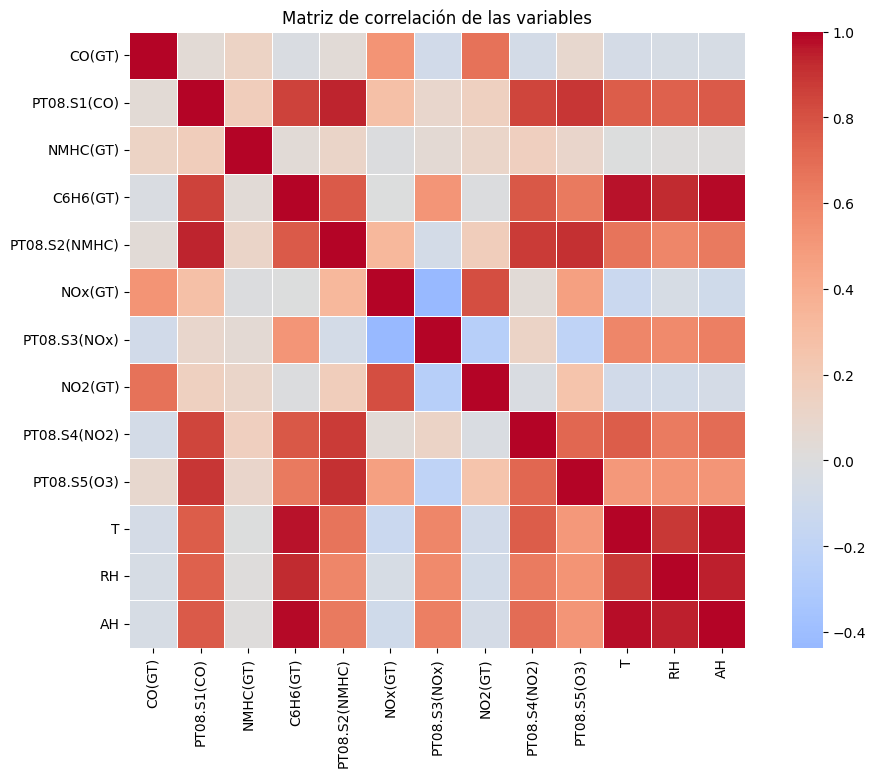

In [54]:
## ¿cómo son las correlaciones entre las variables del dataset?

#eliminando colunas que tienen todos los datos vacios
df_clean = df.dropna(axis=1, how='all')

corr_matrix = df_clean.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5
)
plt.title('Matriz de correlación de las variables')
plt.show()

En el gráfico se observan **correlaciones altas** entre Sensores PT08.S* entre sí y C6H6(GT) con varios sensores

Es posible ver también que Temperatura (T), Humedad relativa (RH) y Humedad Absoluta (AH) están fuertemente correlacionadas con C6H6.  Por lo que podemos concluir parcialmente que **existen relaciones lineales fuertes**.

En lo que respecta a **correlaciones moderadas**, CO(GT) muestra correlación positiva moderada con NOx(GT) y NO2(GT). Podemos decir entonces que os contaminantes están relacionados entre sí.

Por fin, las **correlaciones débiles o negativas**, podemos decir que PT08.S3(NOx) presenta correlaciones negativas o débiles con algunos contaminantes, esto sugiere que existen relaciones inversas.



In [55]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?;
## variable objetivo de acuerdo al caso es CO (Monoxido de Carbono)

corr_with_target = (
    df_clean
    .select_dtypes(include='number')
    .corr()['CO(GT)']
    .drop('CO(GT)')
    .sort_values(ascending=False)
)

corr_with_target.head(3)


,CO(GT)
NO2(GT),0.671127
NOx(GT),0.526451
NMHC(GT),0.128351


De acuerdo al resultado obtenido podemos afirmar:


*   NO2(GT) es la variable con mayor correlación con CO(GT), lo que indica que
ambos contaminantes tienden a aumentar simultáneamente.
*   NOx(GT) también muestra una correlación positiva moderada con CO(GT), reforzando la relación entre contaminantes atmosféricos generados por fuentes comunes.

*   NMHC(GT) presenta una correlación positiva débil, lo que sugiere que su relación con CO(GT) es menos directa o más variable en el tiempo.

A seguir muestro la relacion de la variable objetivo entre las tres variables variables para determinar su grado de afinidad o correlación con cada una.

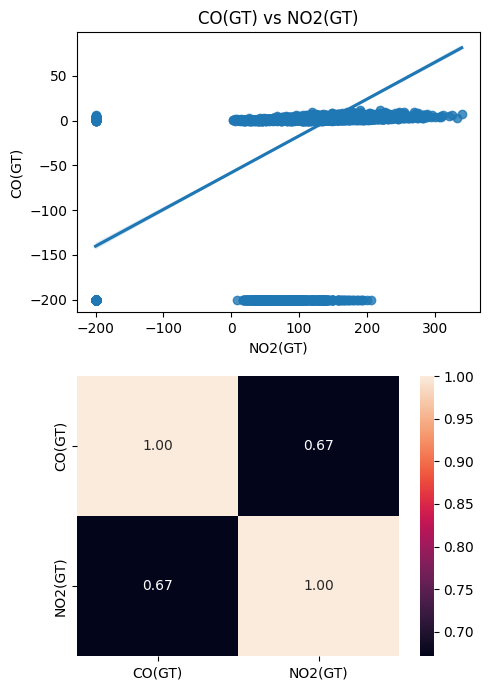

In [56]:
#CO(GT) vs NO2(GT)

fig, axis = plt.subplots(2, 1, figsize=(5, 7))

sns.regplot(ax=axis[0], data=df_clean, x='NO2(GT)', y='CO(GT)')
axis[0].set_title('CO(GT) vs NO2(GT)')

sns.heatmap(
    df_clean[['CO(GT)', 'NO2(GT)']].corr(),
    annot=True,
    fmt='.2f',
    ax=axis[1]
)

plt.tight_layout()
plt.show()


**CO(GT) vs NO2(GT)**

El diagrama de dispersión muestra una tendencia lineal positiva clara.

La recta de regresión confirma una correlación moderada-alta.

El valor de correlación (~0.67) indica una relación significativa.

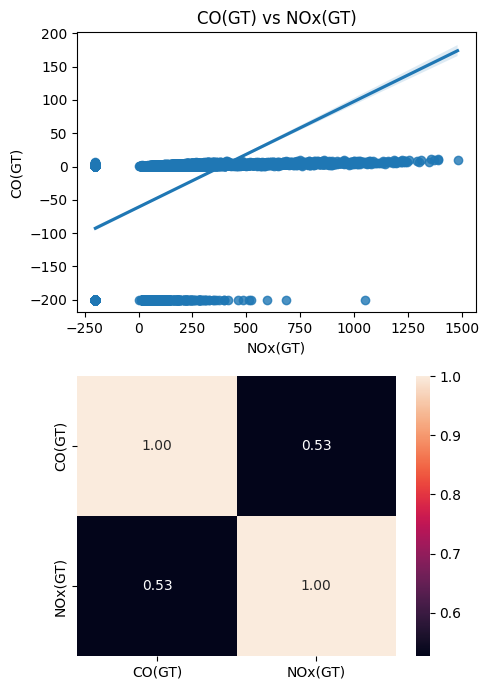

In [11]:
#CO(GT) vs NOx(GT)
fig, axis = plt.subplots(2, 1, figsize=(5, 7))

sns.regplot(ax=axis[0], data=df_clean, x='NOx(GT)', y='CO(GT)')
axis[0].set_title('CO(GT) vs NOx(GT)')

sns.heatmap(
    df_clean[['CO(GT)', 'NOx(GT)']].corr(),
    annot=True,
    fmt='.2f',
    ax=axis[1]
)

plt.tight_layout()
plt.show()

**CO(GT) vs NOx(GT)**

Se observa una tendencia positiva, pero con mayor dispersión.

La correlación (~0.53) es moderada, indicando relación pero menos fuerte que con NO2

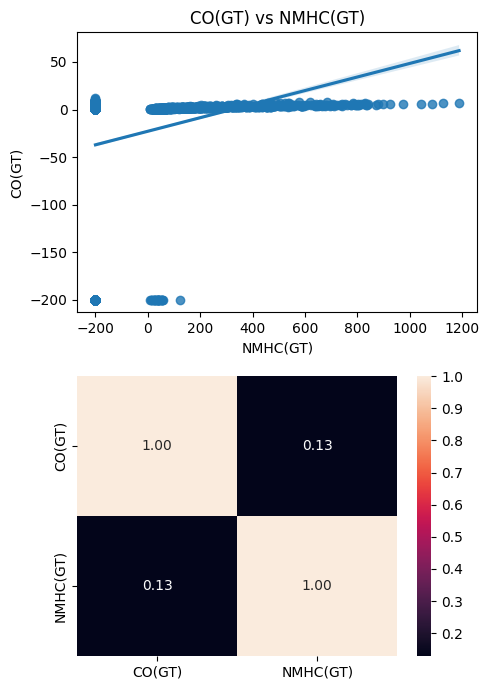

In [12]:
#CO(GT) vs NMHC(GT)
fig, axis = plt.subplots(2, 1, figsize=(5, 7))

sns.regplot(ax=axis[0], data=df_clean, x='NMHC(GT)', y='CO(GT)')
axis[0].set_title('CO(GT) vs NMHC(GT)')

sns.heatmap(
    df_clean[['CO(GT)', 'NMHC(GT)']].corr(),
    annot=True,
    fmt='.2f',
    ax=axis[1]
)

plt.tight_layout()
plt.show()

**CO(GT) vs NMHC(GT)**

La nube de puntos está muy dispersa.

La recta de regresión es poco pronunciada.

La correlación (~0.13) es débil, indicando una relación lineal poco significativa.

**CONCLUSION PARCIAL:**
En resumen, podemos afirmar que estos resultados indican que la concentración de CO está más estrechamente relacionada con NO2 y NOx, mientras que NMHC presenta una influencia menor desde el punto de vista lineal.



In [57]:
## ¿existe alguna variable que no tenga correlación?
corr_matrix = df_clean.select_dtypes(include='number').corr()
max_corr = corr_matrix.abs().apply(lambda x: x.drop(x.name).max())
max_corr.sort_values()



,0
NMHC(GT),0.170007
PT08.S3(NOx),0.621618
CO(GT),0.671127
NOx(GT),0.817139
NO2(GT),0.817139
PT08.S4(NO2),0.874782
PT08.S5(O3),0.909905
PT08.S1(CO),0.933102
PT08.S2(NMHC),0.933102
RH,0.943995


Todas las variables presentan correlación. Sin embargo es posible ver en el resultado que existe al menos una variable que *no presenta correlación significativa* con el resto del dataset. En particular, *NMHC(GT) muestra correlaciones muy bajas* con las demás variables, lo que indica una ausencia de relación lineal relevante. Este comportamiento sugiere que la variable podría depender de factores distintos o presentar relaciones no lineales, y debe analizarse con mayor detalle antes de ser descartada.

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

En lo que respecta a la **distribución de las variables** podemos decir que:


*   Las variables CO(GT), NOx(GT) y NO2(GT) no siguen una distribución normal.
*   Presentan asimetría positiva, con colas largas hacia valores altos.
*   Existen valores extremos (outliers), especialmente en los contaminantes.

También podemos afirmar que el dataset contiene **valores faltantes** codificados como valores negativos (por ejemplo, -200).Estos valores no representan mediciones reales y deben ser tratados antes del modelado.

Sobre las correlaciones, podemos afirmar que existen **correlaciones positivas** moderadas entre los contaminantes (CO, NOx, NO2).Algunas variables, como NMHC(GT), muestran correlaciones débiles, lo que indica una baja relación lineal.

**Conclusiones para implementar un modelo predictivo:**


*   Es imprescindible eliminar o imputar los valores faltantes antes de entrenar el modelo.
*   Se debe considerar el tratamiento de outliers, especialmente en variables altamente sesgadas.
*   Variables como NO2(GT) y NOx(GT) son buenos predictores de CO(GT) debido a su mayor correlación.
*   Variables con baja correlación lineal, como NMHC(GT), pueden aportar poca información en modelos lineales.


Para los pasos susecivos, dado que las relaciones no son estrictamente lineales y existen outliers, modelos lineales simples pueden no ser suficientes. Modelos más robustos (árboles, random forest, boosting) pueden capturar mejor la estructura de los datos.


### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [58]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error


df_clean = df_clean.replace(-200, np.nan)
df_model = df_clean.dropna(subset=['CO(GT)'])

# Eliminando las columnas object
X = df_model.drop(columns=['CO(GT)', 'Date', 'Time'])
y = df_model['CO(GT)']





In [59]:
# separar datos de entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


imputer = SimpleImputer(strategy='mean')
X_train = DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test = DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

In [60]:

# Escalado

scaler = StandardScaler()

X_train = DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test = DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index)

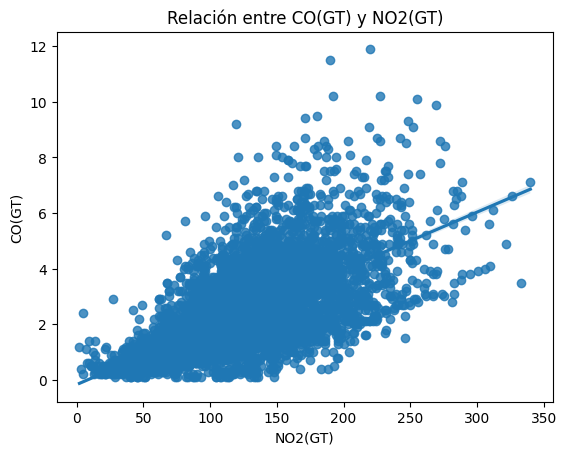

In [61]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción
df_clean[['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'NMHC(GT)']].corr()

# de acuerdo al resultado de la linea anterior NO2(GT) tiene la relacion mas alta, vamos a graficarlo
sns.regplot(data=df_clean, x='NO2(GT)', y='CO(GT)')
plt.title('Relación entre CO(GT) y NO2(GT)')
plt.show()


In [18]:
# entrena el modelo con los datos de entrenamiento

X_train_model = X_train[['NO2(GT)']]
X_test_model = X_test[['NO2(GT)']]

model = LinearRegression()
model.fit(X_train_model, y_train)

LinearRegression()

In [62]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

# Coeficiente (pendiente)
coeficiente = model.coef_[0]

# Intercepto
intercepto = model.intercept_

print("Coeficiente (β1) para NO2(GT):", coeficiente)
print("Intercepto (β0):", intercepto)

Coeficiente (β1) para NO2(GT): 0.9741873608662502
Intercepto (β0): 2.166297442580225


Explica qué indican estos parámetros

El coeficiente indica cuánto varía la concentración de CO(GT) por cada unidad de incremento en NO2(GT), manteniendo el resto constante.
El intercepto representa el valor estimado de CO(GT) cuando NO2(GT) es igual a cero.

In [63]:
# realiza las predicciones para el conjunto de datos de test
y_pred = model.predict(X_test_model)

# Visualizado algunas predicciones
y_pred[:10]

array([5.73822635, 2.16629744, 2.77646166, 2.69419042, 1.35728274,
       3.68144532, 3.76371656, 2.16629744, 2.30340202, 1.6657999 ])

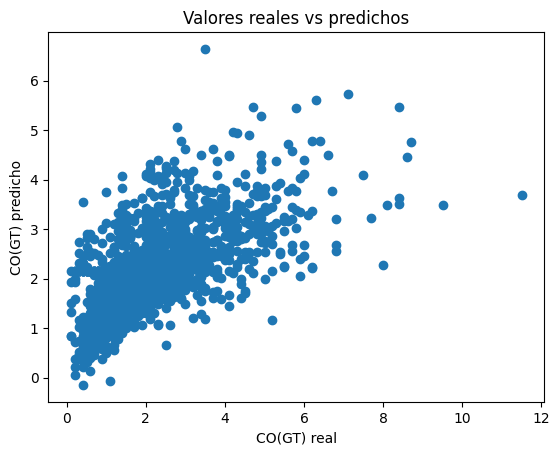

In [64]:

plt.scatter(y_test, y_pred)
plt.xlabel('CO(GT) real')
plt.ylabel('CO(GT) predicho')
plt.title('Valores reales vs predichos')
plt.show()

In [65]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(1.0921606431515292)

Al tratarse de un problema de regresión, la métrica más adecuada es el RMSE (Root Mean Squared Error). La respuesta indica que,en media, el modelo erra cerca de +-1.09 unidades de CO(GT).

In [23]:
# ¿Qué error tiene el modelo? Explícalo.
rmse

np.float64(1.0921606431515292)

El error del modelo es de aproximadamente 1.09 unidades de CO(GT), lo que representa la desviación media de las predicciones respecto a los valores reales. Este error es aceptable considerando la simplicidad del modelo y la complejidad de los datos.

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [66]:
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)


LinearRegression()

In [25]:
# Prediccion
y_pred_multi = model_multi.predict(X_test)

y_pred_multi[:10]

array([4.587066  , 1.21236333, 3.37791262, 2.05487118, 1.06622785,
       2.55687771, 3.80974112, 1.57224981, 3.00117125, 2.82618161])

In [67]:
#evaluación del modelo
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
rmse_multi

np.float64(0.47705767726743203)

¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

El error del modelo múltiple es de aproximadamente 0.48, siendo notablemente menor que el del modelo simple. Por tanto, el modelo múltiple presenta un mejor desempeño predictivo.

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error




tree_model = DecisionTreeRegressor(
    criterion='poisson',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    random_state=42
)

# Entrenando el modelo
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_leaf=2,
                      min_samples_split=10, random_state=42)

In [69]:
#Predicciones
y_pred_tree = tree_model.predict(X_test)

# Ver algunas predicciones
y_pred_tree[:10]

array([5.9       , 0.825     , 4.00769231, 2.17058824, 0.83809524,
       2.30714286, 3.81      , 2.03571429, 3.10357143, 2.8425    ])

Calcula MAE, R2 y RMSLE

In [70]:

# MAE
mae_tree = mean_absolute_error(y_test, y_pred_tree)

# R2
r2_tree = r2_score(y_test, y_pred_tree)

# RMSLE
rmsle_tree = np.sqrt(mean_squared_log_error(y_test, y_pred_tree))

mae_tree, r2_tree, rmsle_tree

(0.3144240558014131, 0.885995098936697, np.float64(0.14974157868785992))

¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

In [71]:
y_pred_train = tree_model.predict(X_train)

mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))

mae_train, r2_train, rmsle_train

(0.20939128734818319, 0.9528092073746467, np.float64(0.10225591116300127))

Existe un leve overfitting, ya que el modelo obtiene mejores resultados en el conjunto de entrenamiento que en el de test. Para comprobarlo es necesario comparar las métricas de ambos conjuntos



¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

El modelo de árboles de decisión presenta un mejor rendimiento que los modelos de regresión lineal simple y múltiple. Esto se debe a que obtiene un mayor valor de R2 y menores errores de predicción, además de ser capaz de modelar relaciones no lineales entre las variables.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

El modelo que obtiene mejores resultados de regresión es el modelo de Árboles de Decisión.
**En el EDA se observó que:**

*   Existen relaciones no lineales entre la variable objetivo CO(GT) y varias variables predictoras.
*   Algunas variables presentan correlaciones moderadas, pero ninguna explica por sí sola el comportamiento del objetivo.
*   El dataset contiene valores atípicos y distribuciones asimétricas, lo cual limita el desempeño de modelos estrictamente lineales.

**En base a las decisiones tomadas sobre los datos:**

Se eliminó las columnas tipo object (Date, Time), fue realizado tratamiento de valores inválidos (como -200).Selección de variables basada en correlación para el modelo simple y uso de todas las variables para modelos más complejos.

**En base a los hiperparámetros elegidos**

El modelo de árboles de decisión se entrenó con:

criterion = 'poisson'

max_depth = 10

min_samples_split = 10

min_samples_leaf = 2

max_features = None

Estos hiperparámetros evitan un crecimiento excesivo del árbol, reducen el riesgo de overfitting y mantienen un buen equilibrio entre sesgo y varianza.

**CONCLUSION:**
El modelo de árboles de decisión obtiene los mejores resultados, ya que presenta menor error, mayor R2 y es capaz de modelar relaciones no lineales observadas durante el EDA





## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

In [ ]:
## No ha sido posible culminar con la revision del estado del arte hasta este momento.